In [1]:
#--- Code for loading the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import sys
sys.path.append('../helpers')
from iaml01cw2_helpers import load_FashionMNIST
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST('../FashionMNIST')

Xtrn_orig = Xtrn.copy()
Xtst_orig = Xtst.copy()

Xtrn /= 255.0
Xtst /= 255.0

Xmean = np.mean(Xtrn, axis=0)

Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean
#<----

/Users/xx/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
# Q1.1
def iaml01cw2_q1_1():
#
    print(Xtrn_nm[0,:4])
    print(Xtrn_nm[-1,:4])
    
iaml01cw2_q1_1()   # comment this out when you run the function

[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


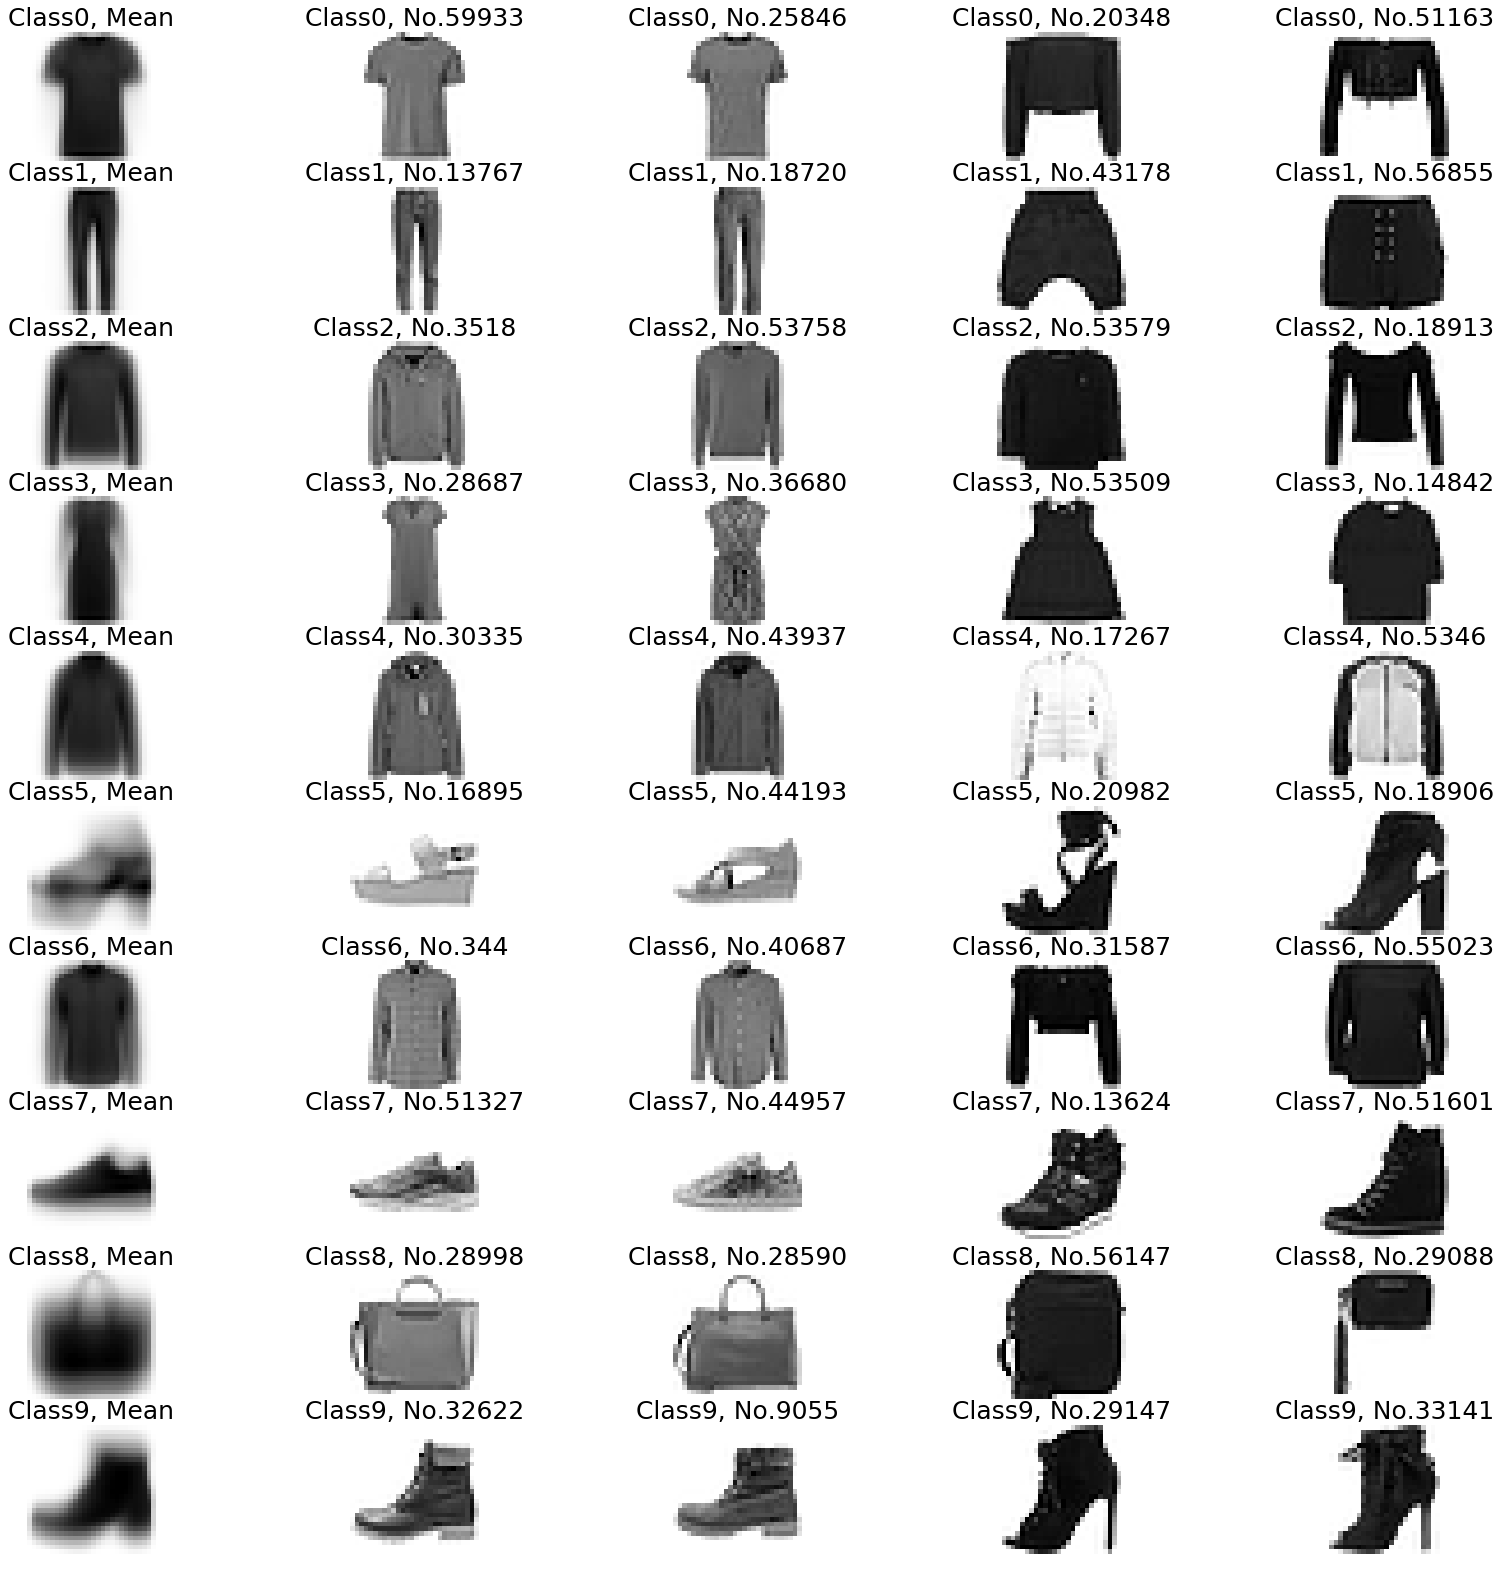

In [3]:
# Q1.2
def iaml01cw2_q1_2():
#
    Xtrn_df = pd.DataFrame(Xtrn)

    i = 0
    select = [0, 1, -2, -1]
    plt.figure(figsize=(28,28))
    
    for label in range(10):
        label_df = Xtrn_df[Ytrn==label]
        label_mean = np.mean(label_df, axis=0)
        dist = np.sqrt(np.sum(np.square(label_df-label_mean), axis=1)).sort_values()

        i += 1
        plt.subplot(10,5,i)
        plt.imshow(np.array(label_mean).reshape(28,28), cmap=plt.cm.gray_r)
        plt.title('Class{}, Mean'.format(label), fontsize=25)
        plt.axis('off')

        for value in select:
            i += 1
            plt.subplot(10,5,i)
            plt.imshow(np.array(Xtrn_df.loc[dist.index[value]]).reshape(28,28), cmap=plt.cm.gray_r)
            plt.title('Class{}, No.{}'.format(label, dist.index[value]), fontsize=25)
            plt.axis('off')

    plt.savefig('Q1_2.pdf')
    plt.show()
    
iaml01cw2_q1_2()   # comment this out when you run the function

In [4]:
# Q1.3
def iaml01cw2_q1_3():
#
    pca = PCA().fit(Xtrn_nm)
    print(pca.explained_variance_[:5])
    
iaml01cw2_q1_3()   # comment this out when you run the function

[19.80980567 12.11221047  4.10615661  3.38182839  2.62477022]


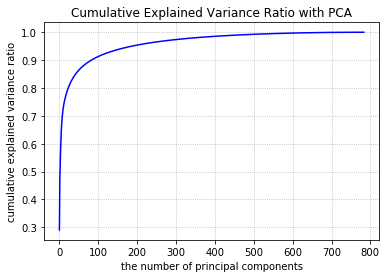

In [5]:
# Q1.4
def iaml01cw2_q1_4():
#
    pca = PCA().fit(Xtrn_nm)
    
    plt.plot(np.cumsum(pca.explained_variance_ratio_), c='blue')
    plt.grid(linestyle=':')
    plt.title('Cumulative Explained Variance Ratio with PCA')
    plt.xlabel("the number of principal components")
    plt.ylabel("cumulative explained variance ratio")
    plt.savefig('Q1_4.pdf')
    plt.show()

iaml01cw2_q1_4()   # comment this out when you run the function

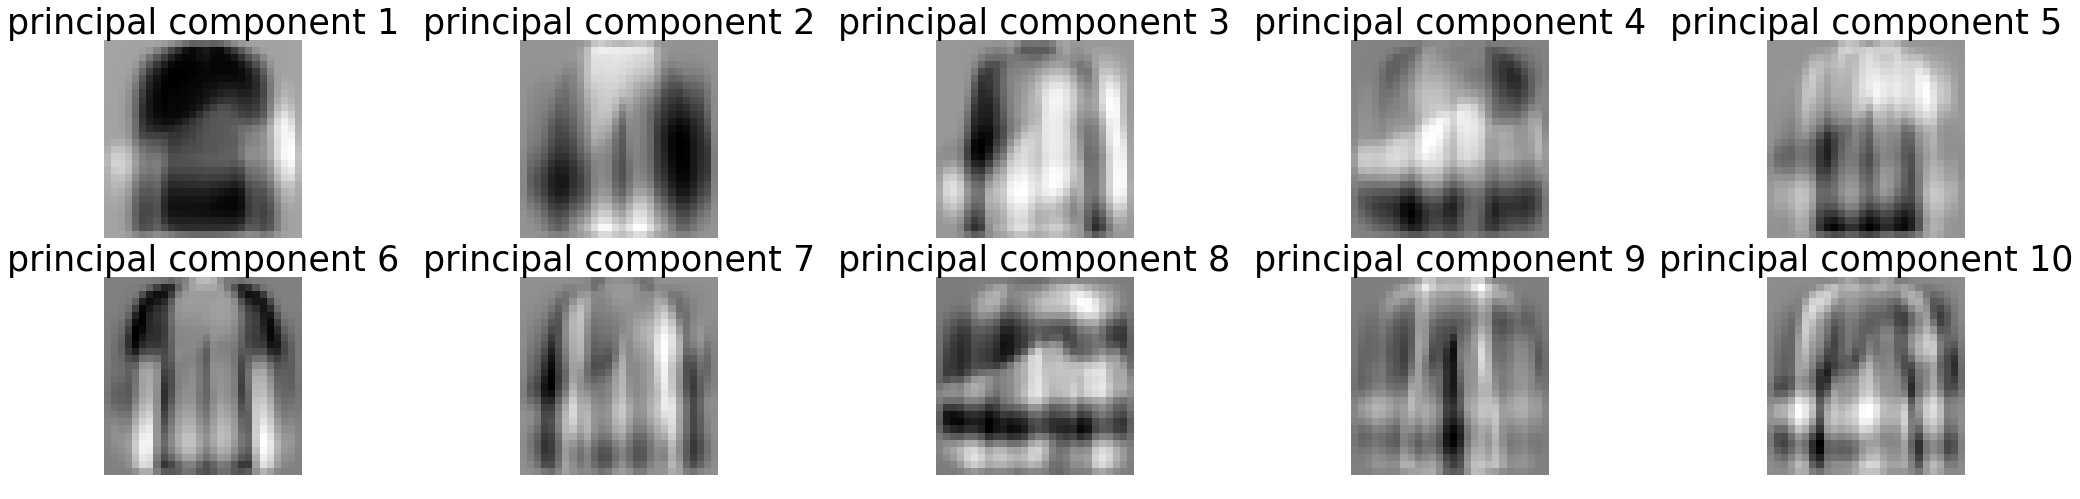

In [6]:
# Q1.5
def iaml01cw2_q1_5():
#
    pca = PCA().fit(Xtrn_nm)
    
    plt.figure(figsize=(36,8))
    for i in range(1,11):
        plt.subplot(2,5,i)
        plt.imshow(pca.components_[i-1].reshape(28,28), cmap=plt.cm.gray_r)
        plt.title('principal component {}'.format(i), fontsize=35)
        plt.axis('off')

    plt.savefig('Q1_5.pdf')
    plt.show()
    
iaml01cw2_q1_5()   # comment this out when you run the function

In [7]:
# Q1.6
def iaml01cw2_q1_6():
#
    components = [5, 20, 50, 200]
    recondict = {} 
    [recondict.setdefault(x, []) for x in range(10)] 
    
    for number in components:
        pca = PCA(n_components=number, random_state=1)
        pca.fit(Xtrn_nm)

        for label in range(10):
            sample = Xtrn_nm[Ytrn==label][0]
            sample = np.array(sample).reshape(1, -1)
            
            trans = pca.transform(sample)
            recon = pca.inverse_transform(trans)
            recondict[label].append(recon)
            
            RMSE = np.sqrt(mean_squared_error(sample, recon))
            print('K={}, class={}, RMSE={}'.format(number, label, RMSE))

    return recondict

iaml01cw2_q1_6()   # comment this out when you run the function

K=5, class=0, RMSE=0.2561486638821891
K=5, class=1, RMSE=0.19802439610928813
K=5, class=2, RMSE=0.19870015563231877
K=5, class=3, RMSE=0.14565797934152952
K=5, class=4, RMSE=0.11820870306754988
K=5, class=5, RMSE=0.18112976154332247
K=5, class=6, RMSE=0.1294792775623764
K=5, class=7, RMSE=0.16562538305229438
K=5, class=8, RMSE=0.22339658761007575
K=5, class=9, RMSE=0.1835104209079604
K=20, class=0, RMSE=0.14994362224511562
K=20, class=1, RMSE=0.1404983072537151
K=20, class=2, RMSE=0.14560485304923457
K=20, class=3, RMSE=0.1072704847155979
K=20, class=4, RMSE=0.10267068061441671
K=20, class=5, RMSE=0.15859408190386287
K=20, class=6, RMSE=0.09590067210092867
K=20, class=7, RMSE=0.1278335795692
K=20, class=8, RMSE=0.14493295953684845
K=20, class=9, RMSE=0.15105775661805765
K=50, class=0, RMSE=0.12716915317906297
K=50, class=1, RMSE=0.09491171101685136
K=50, class=2, RMSE=0.12433246932269029
K=50, class=3, RMSE=0.08325878703847994
K=50, class=4, RMSE=0.08808120957287349
K=50, class=5, RMSE

{0: [array([[ 1.06192472e-06,  2.78150533e-05,  1.44802332e-04,
           3.91639121e-04,  8.16576244e-04,  1.49018720e-03,
           2.79524484e-03,  9.30861253e-03,  2.50349506e-02,
           5.76816918e-02,  1.02559357e-01,  1.26679766e-01,
           1.30365990e-01,  1.36996402e-01,  1.43450475e-01,
           1.45858439e-01,  1.43582725e-01,  1.28841132e-01,
           8.75409070e-02,  4.36117426e-02,  1.91215598e-02,
           8.88749803e-03,  5.27325663e-03,  3.90000550e-03,
           2.70855722e-03,  1.58730699e-03,  6.14676447e-04,
           1.33540518e-04,  2.68484085e-05,  9.96085596e-05,
           3.90276944e-04,  1.49243213e-03,  3.12721693e-03,
           1.01118138e-02,  3.60844745e-02,  8.19442895e-02,
           1.50552001e-01,  2.28389392e-01,  2.81585855e-01,
           3.24719926e-01,  3.49148813e-01,  3.30030149e-01,
           3.15612455e-01,  3.51614513e-01,  3.60918742e-01,
           3.27424531e-01,  2.78148862e-01,  2.06709789e-01,
           1.28202422

K=5, class=0, RMSE=0.2561486638821891
K=5, class=1, RMSE=0.19802439610928813
K=5, class=2, RMSE=0.19870015563231877
K=5, class=3, RMSE=0.14565797934152952
K=5, class=4, RMSE=0.11820870306754988
K=5, class=5, RMSE=0.18112976154332247
K=5, class=6, RMSE=0.1294792775623764
K=5, class=7, RMSE=0.16562538305229438
K=5, class=8, RMSE=0.22339658761007575
K=5, class=9, RMSE=0.1835104209079604
K=20, class=0, RMSE=0.14994362224511562
K=20, class=1, RMSE=0.1404983072537151
K=20, class=2, RMSE=0.14560485304923457
K=20, class=3, RMSE=0.1072704847155979
K=20, class=4, RMSE=0.10267068061441671
K=20, class=5, RMSE=0.15859408190386287
K=20, class=6, RMSE=0.09590067210092867
K=20, class=7, RMSE=0.1278335795692
K=20, class=8, RMSE=0.14493295953684845
K=20, class=9, RMSE=0.15105775661805765
K=50, class=0, RMSE=0.12716915317906297
K=50, class=1, RMSE=0.09491171101685136
K=50, class=2, RMSE=0.12433246932269029
K=50, class=3, RMSE=0.08325878703847994
K=50, class=4, RMSE=0.08808120957287349
K=50, class=5, RMSE

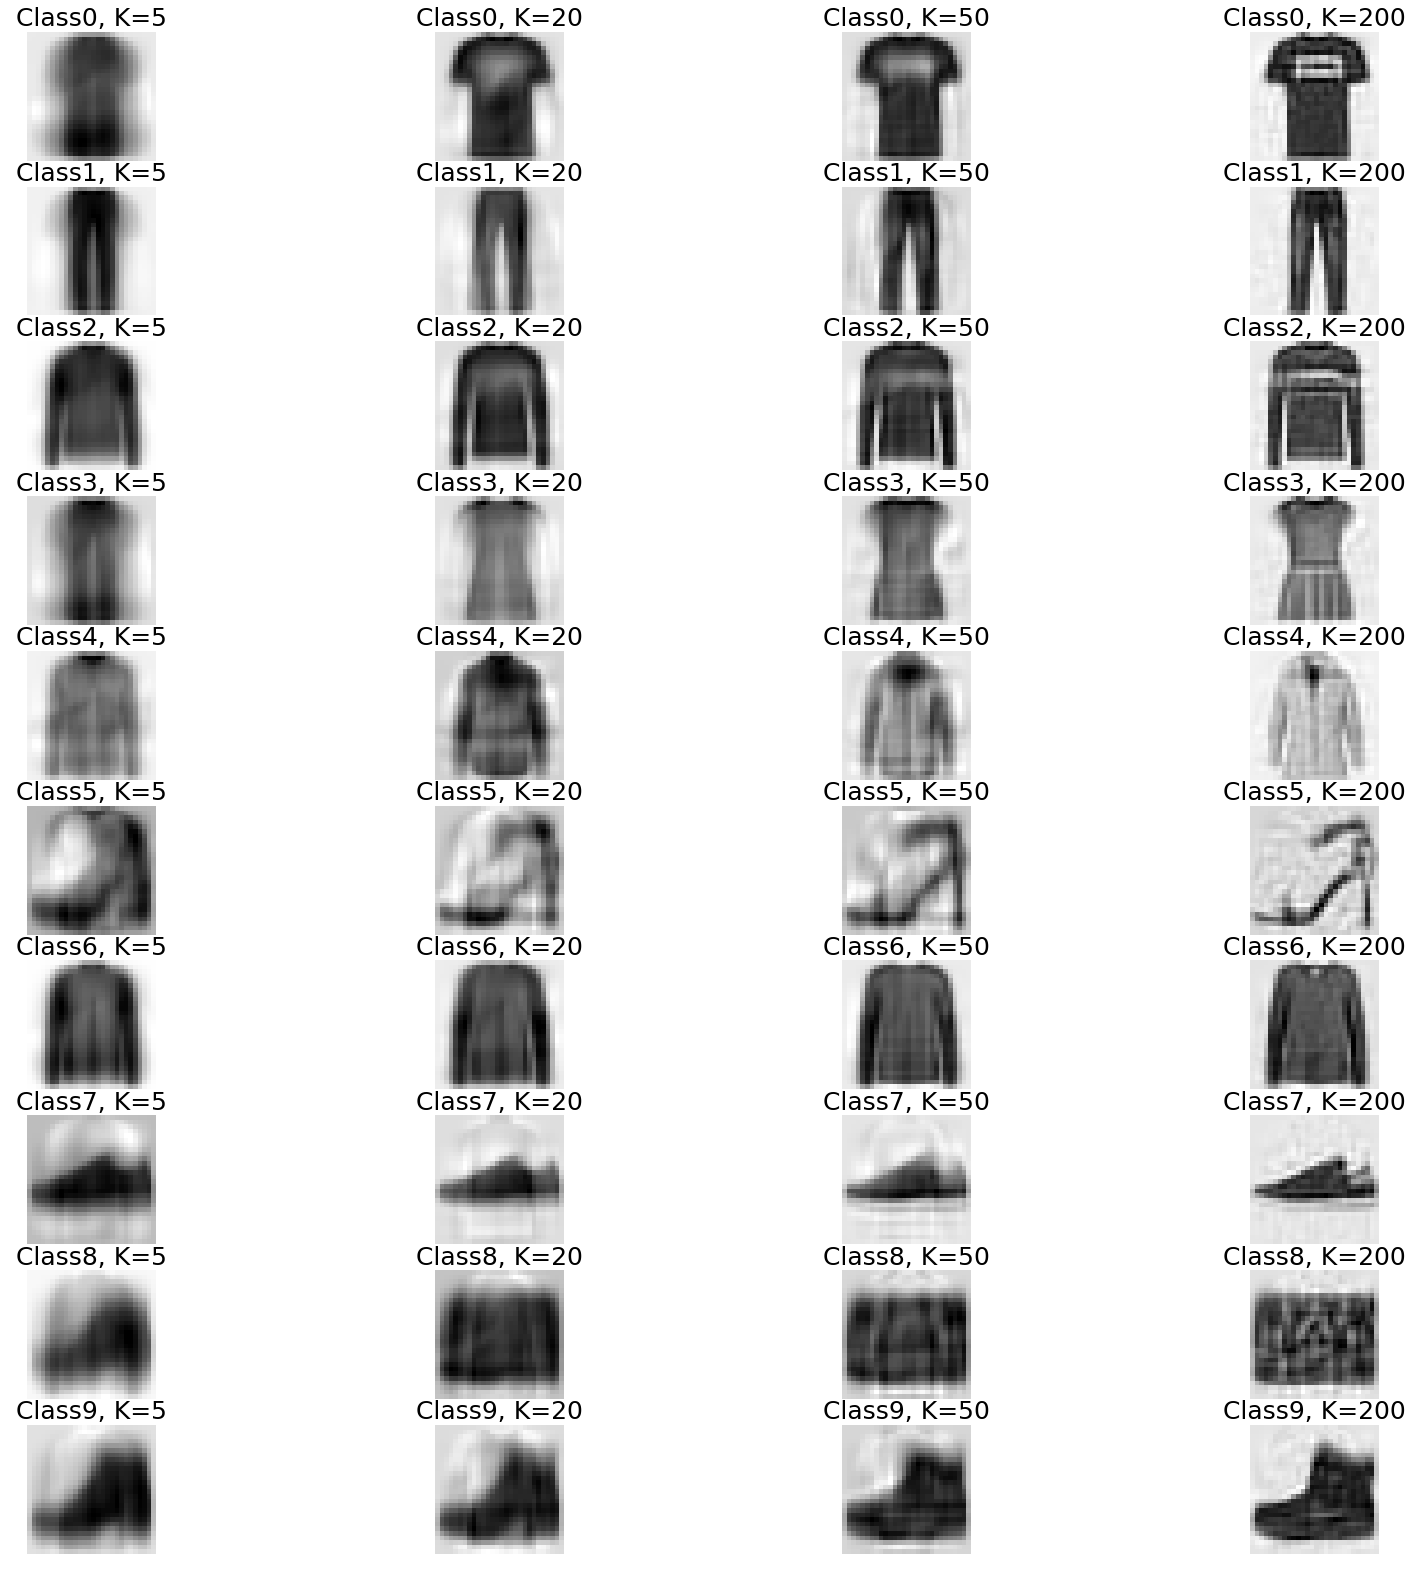

In [8]:
# Q1.7
def iaml01cw2_q1_7():
#
    recondict = iaml01cw2_q1_6()
    label = 0
    count = 0
    components = [5, 20, 50, 200]

    plt.figure(figsize=(28,28))           
    for i in range(1,41):
        plt.subplot(10,4,i)
        plt.imshow((recondict[label][count]+Xmean).reshape(28,28), cmap=plt.cm.gray_r)
        plt.title('Class{}, K={}'.format(label, components[count]), fontsize=25)
        plt.axis('off')

        count += 1
        if count==4:
            label += 1
            count = 0 

    plt.savefig('Q1_7.pdf')
    plt.show()
    
iaml01cw2_q1_7()   # comment this out when you run the function

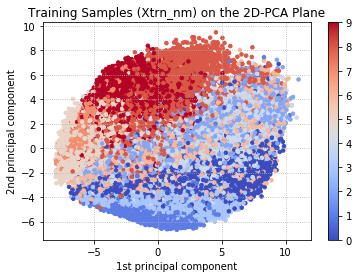

In [9]:
# Q1.8
def iaml01cw2_q1_8():
#
    pca = PCA(n_components=2)
    samples = pca.fit_transform(Xtrn_nm)

    plt.grid(linestyle=':')
    plt.scatter(samples[:, 0], samples[:, 1], c=Ytrn, cmap=plt.cm.coolwarm, s=50, marker='.')
    plt.title('Training Samples (Xtrn_nm) on the 2D-PCA Plane')
    plt.xlabel('1st principal component')
    plt.ylabel('2nd principal component')
    plt.colorbar()
    plt.savefig('Q1_8.pdf')
    plt.show()
    
iaml01cw2_q1_8()   # comment this out when you run the function

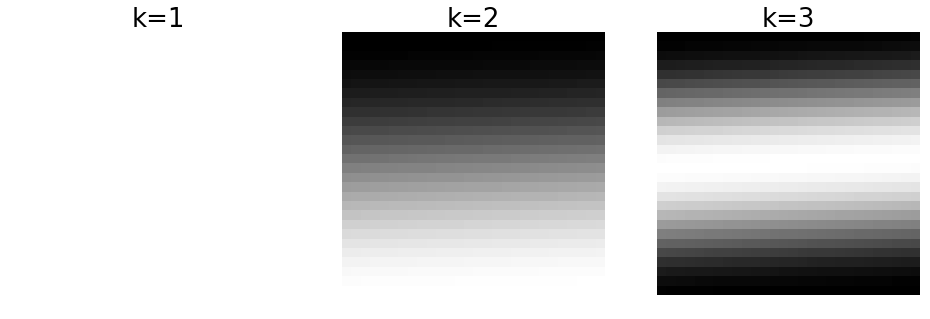

In [10]:
# Q1.9
def iaml01cw2_q1_9():
#
    D = 784
    plt.figure(figsize=(16,6))
    for k in range(1,4):
        c = [np.cos(np.pi*(k-1)*(2*i-1)/(2*D)) for i in range(1,D+1)]
        plt.subplot(1,3,k)
        plt.imshow(np.array(c).reshape(28,28), cmap=plt.cm.gray_r)
        plt.title('k={}'.format(k), fontsize=26)
        plt.axis('off')

    plt.savefig('Q1_9.pdf')
    plt.show()

iaml01cw2_q1_9()   # comment this out when you run the function

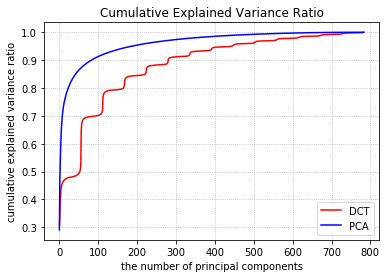

In [11]:
# Q1.10
def iaml01cw2_q1_10():
#
    D = 784
    var = []

    for k in range(1,D+1):
        c = [np.cos(np.pi*(k-1)*(2*i-1)/(2*D)) for i in range(1,D+1)]
        z = Xtrn_nm.dot(c)
        var.append(np.var(z))

    var_ratio = var/np.sum(var)
    
    pca = PCA().fit(Xtrn_nm)

    plt.plot(np.cumsum(var_ratio), c='red', label='DCT')
    plt.plot(np.cumsum(pca.explained_variance_ratio_), c='blue', label='PCA')
    plt.grid(linestyle=':')
    plt.legend()
    plt.title('Cumulative Explained Variance Ratio')
    plt.xlabel("the number of principal components")
    plt.ylabel("cumulative explained variance ratio")
    
    plt.savefig('Q1_10.pdf')
    plt.show()
    
iaml01cw2_q1_10()   # comment this out when you run the function